# AirBnB Rooms in Copenhagen, Denmark: Activities, Prices, and Availabilities

## 1. Introduction

### 1.1 Background
The global megatrends such as sustainability, minimalism, and being cozy (the Danish hygge), has kept Scandinavia's capital cities of Copenhagen, Denmark, Oslo, Norway, and Stockholm, Sweden, busy with tourists all year round. Arguably, these countries have led the revolution of these megatrends since the 50's as showcased in their classic designs, gastronomy, and daily life activities.

### 1.2 Problem Statement
These cities, however, are nothing like the giants of urban tourism such as Paris, London, or Rome. This is because tourist influx has just started to gain significant presence in these cities. Therefore, most information come from established tourism guide books (i.e., Lonely Planet), which others try to avoid, since it does not completely paint the full picture of what the city may really look like. In addition, these Scandinavian cities are notoriously expensive, making potential tourists put some heavy lifting on location research to make a bang for their buck before finally deciding to book a ticket to experience these cities. The expensiveness of these cities has also pushed tourists to use apartment sharing options such as AirBnB's to level out the total cost. Ultimately, most of the tourists are self-researching in order to guide themselves on where to stay and what to do. There may be a need with additional insights hyperfocusing in activities, price points, and locations of rental rooms and apartments such as AirBnB.

In this report, we will focus on Copenhagen, the capital of Denmark, and show some detailed insights on where to potentially stay, what activities to expect, and how much money to prepare in terms of AirBnB accommodation.

## 2. Data

### 2.1 Dataset

In this analysis, two main data sources were used. First, Copenhagen's AirBnB listings inventory and their respective statistics since 2011 to present: <a href="http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2020-10-27/visualisations/listings.csv">AirBnB dataset</a> 

   - The dataset comprises of latitudes, longitudes to geolocate each listing.
   - There are 11 neighbourhoods in total, which will be used in further analysis.
   - There are four types of accommodation, with information on pricing and yearly availability. 
    
The second dataset used is a non-exhaustive venue categories arround AirBnB listings, which was sourced form Foursquare API: <a href="https://developer.foursquare.com/">documentation</a> . Note, however, that Foursquare is not heavily utilized in Scandinavia, therefore these datasets may not be updated or heavily enriched in comparison to more popular, touristy places.

### 2.2 Data Cleaning and Feature Selection

Most of the data cleaning and transformation was performed in the AirBnB dataset. For instance, removing NaN values, renaming the neighbourhood columns, and removing auxillary information such as, total number of reviews, listing name and property owner.

Two new features were added. The first feature was named as <b>utilization_factor</b> (Eq. 1). This process, normalizes the utilization of a listing as a function of monthly_reviews(i.e., how often it is used) and yearly availability (i.e., how often it is available to be used).

    Eq. (1): utilization_factor = monthly_reviews / 30.5 days * yearly availability

The second feature was named as <b>price_category</b>. Where, the price ranges were binned to three categories - low, med, high using <b>pandas.cut</b> method.

In summary, there were <b>6 features</b> that were used for the AirBnB dataset, namely:

- <b>Neighbourhood</b> - Amager East, Amager West, Bispebjerg, Bronshoj, Indre By, Frederiksberg, Norrebro, Osterbro, Vesterbro, Vanlose, Valby
- <b>Room type</b> - Shared Room, Private Room, Apartment, Hotel type 
- <b>Price, Latitude, Longitude, Utilization Factor</b>

## 3. Exploratory Data Analysis

### 3.1 Relationship between Accommodation Type, Price, and Neighbourhood 

There is a wide variability in the availability of data among accommodation types as a function of neighbourhood. Figure 1, shows that majority of AirBnB accommodations are of type 'Private Room' or 'Entire Apartment'. This is expected since this is the target inventory of AirBnB, and less of a 'Shared Room' or 'Hotel Room'. In terms of pricing, we see that the prices widely vary among neighbourhoods with significant outliers as shown by the boxplots. Within the same accommodation types, we see that the 'Private Room' is cheaper, in comparison to 'Entire Apartment' by up to 2-folds. This is expected since 'Private Rooms' have smaller space and could accommodate lesser people in comparison to 'Entire Apartment.

Moving forward, we analysed further the 'Private Room' and 'Entire Apartment' accommodation types and dropped the 'Shared Room' and 'Hotel Room' out of our analysis. Furthermore, we removed the outliers from our dataset based on pricing as shown in Figure 2.

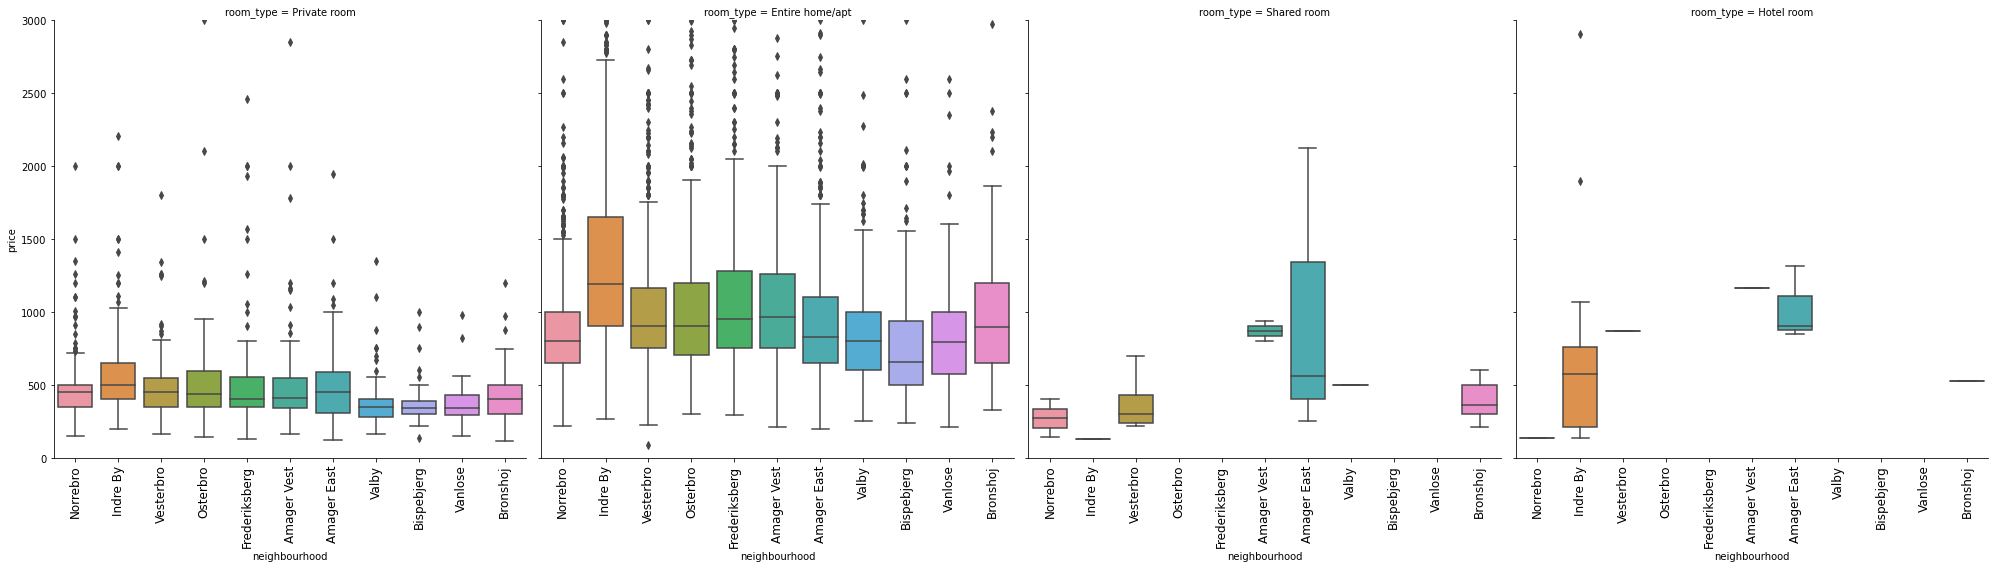
<center> Figure 1. Boxplots of AirBnB listings with respect to neighbourhood, accommodation type and as a function of pricing.

Zooming in further with 'Private Room' and 'Entire Apartment' type accommodations in Figure 2. We clearly see the differentiation in prices among Neighbourhoods. In both accommodation types, Indre By shows the most expensive median price at about DKK 500 for a Private Room or DKK1100 for an Entire Apartment. It's good to note that the median price in Norrebro, Vesterbro, Frederiksberg, Amager West, Amager East are fairly similar while a cheaper accommodatoin can be found in Bispebjerg, Valby, Bronshoj, and Vanlose for both accommodation types. 

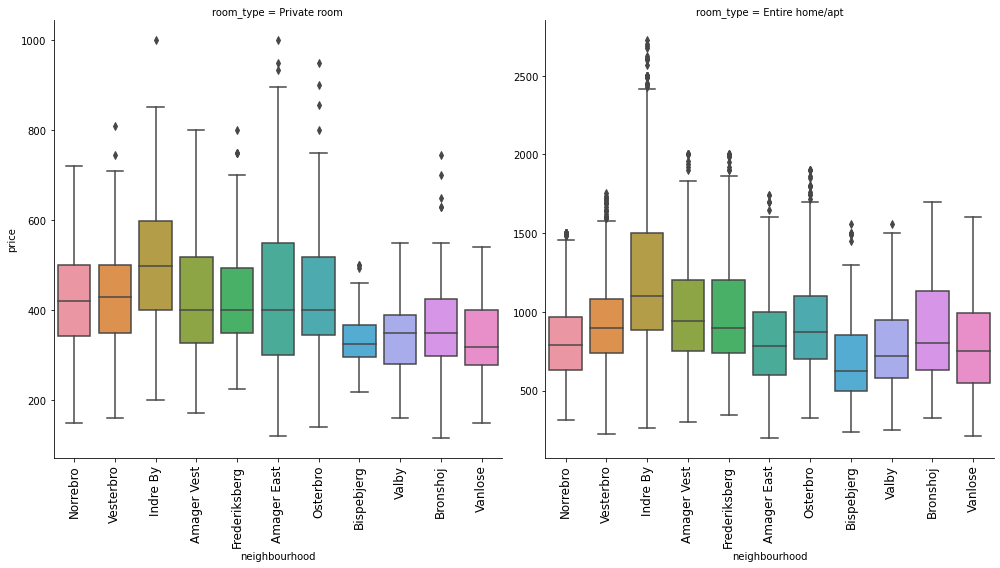
<center> Figure 2. Boxplots of AirBnB listing removed of outliers based on accommodation prices.

### 3.2 Relationship between Number of Accommodations, Availability and Price 

Looking at the Private Room listing, we see that majority of the price range is at DKK 400, on the other hand, the price range for an Entire Apartment is at DKK 800. For both of the accommodations, the pricing is skewed to the right, suggesting that there are significant listings that are below the median price points. In part, this is due to the fact that there are accommodations that are highly priced, thus affecting the median price. 

Interestingly, the utilization factor between the two accommodations have its highest between 0-5. This suggests that the utilization of Room Listing and Apartment do not seem to vary greatly, therefore their relative availability is comparable.

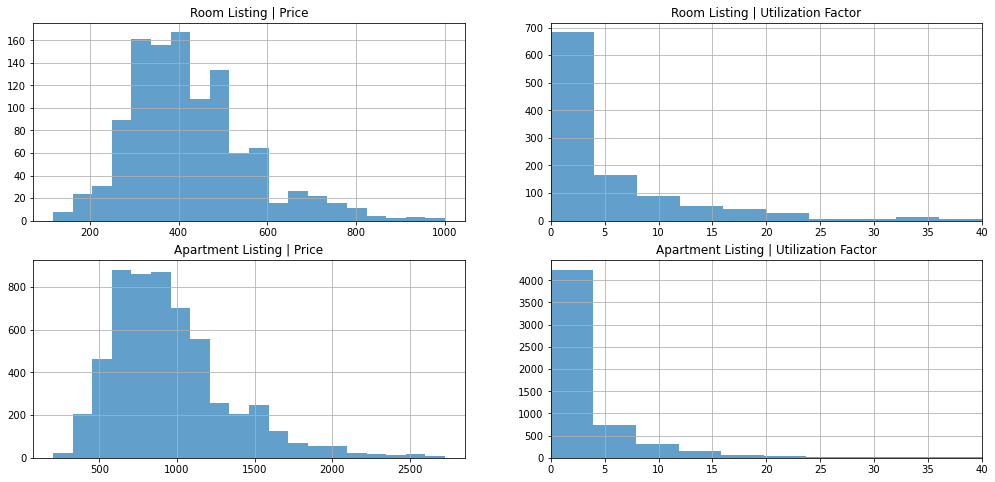
<center>Figure 3. Histogram plots of AirBnB listing with respect to Price and Utilization Factor (Availability).

### 3.3 Mapping of AirBnB listing

Using <b>Folium Package</b> we mapped out the AirBnB listings in Copenhagen for the different types of accommodation. Clearly, we see that the density of the AirBnB listings are concentrated in the center. 

Ultimately, both of the listing types show similar characteristics (i.e., geographical density, utilization factor, neighbourhood characteristics). As such, we are going to further analyse only the Private Room accommodation type as we move forward with our analysis.

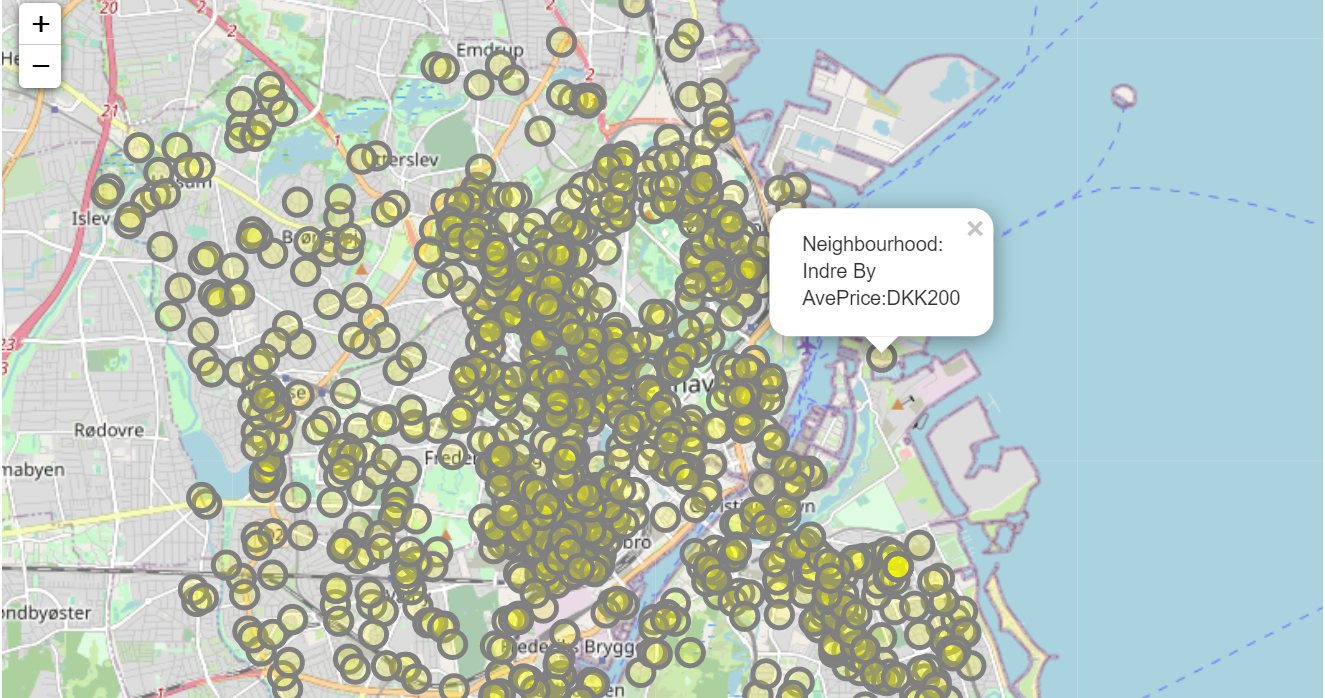

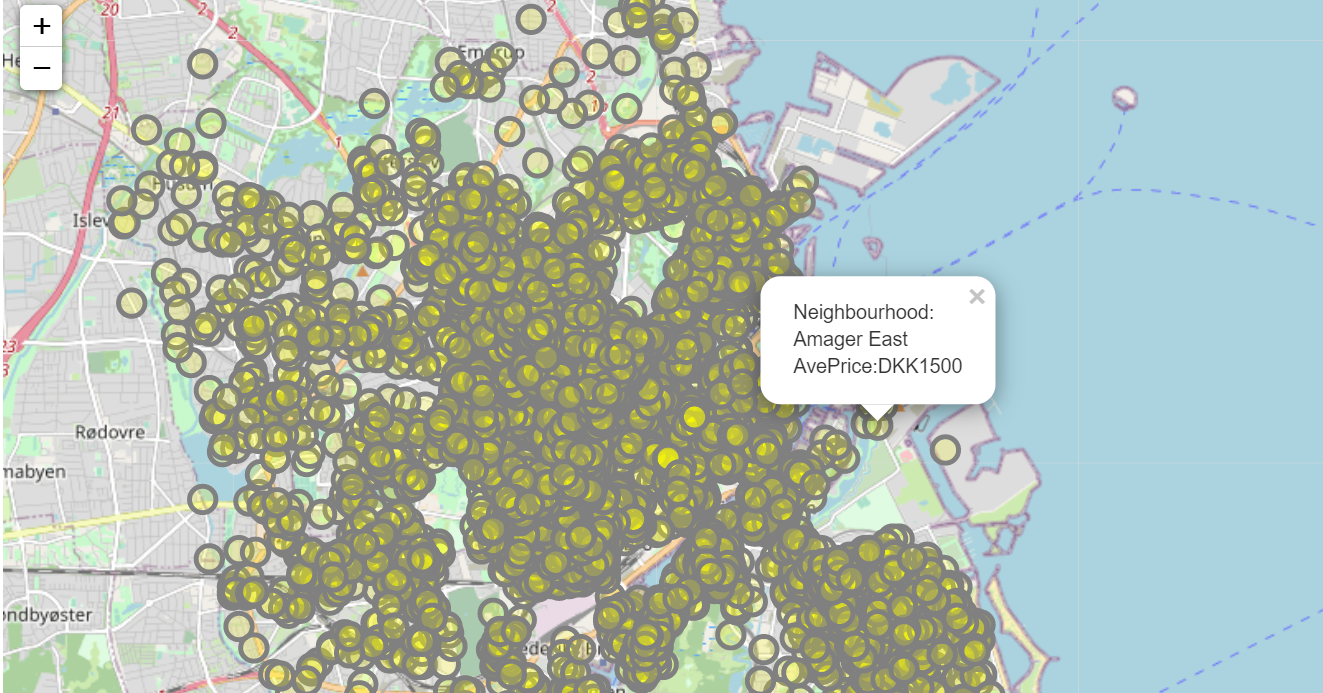
<center>Figure 4. Map of Private Room (above image) and Entire Apartment (below image) listings from AirBnB

## 4. Using API Foursquare

### 4.1 Data Reduction of AirBnB Private Room Listings

We used the API Foursquare and explore the nearby venues in each of the listing. We can see, however, that we have about 1000 datapoints for the Private Room accommodation. A potential issue arising from using the complete dataset is the limited number of calls that we can use with a regular API Foursquare account. One of the potential solutions is to create a representative dataset of the original datapoints. 

We used the <b>pandas.groupby</b> to group the dataset according to their neighbourhood (11 unique values) and price category(3 values). We used the median statistic to obtain the representative price, latitude, and longitude. Ultimately, this led us to 29 datapoints (Table 1), which we argue to best represent the 1000 datapoints.

<center>Table 1. Representative dataset, with 29 datapoints, of Private Room listing to be used for API Foursquare data mining</center>

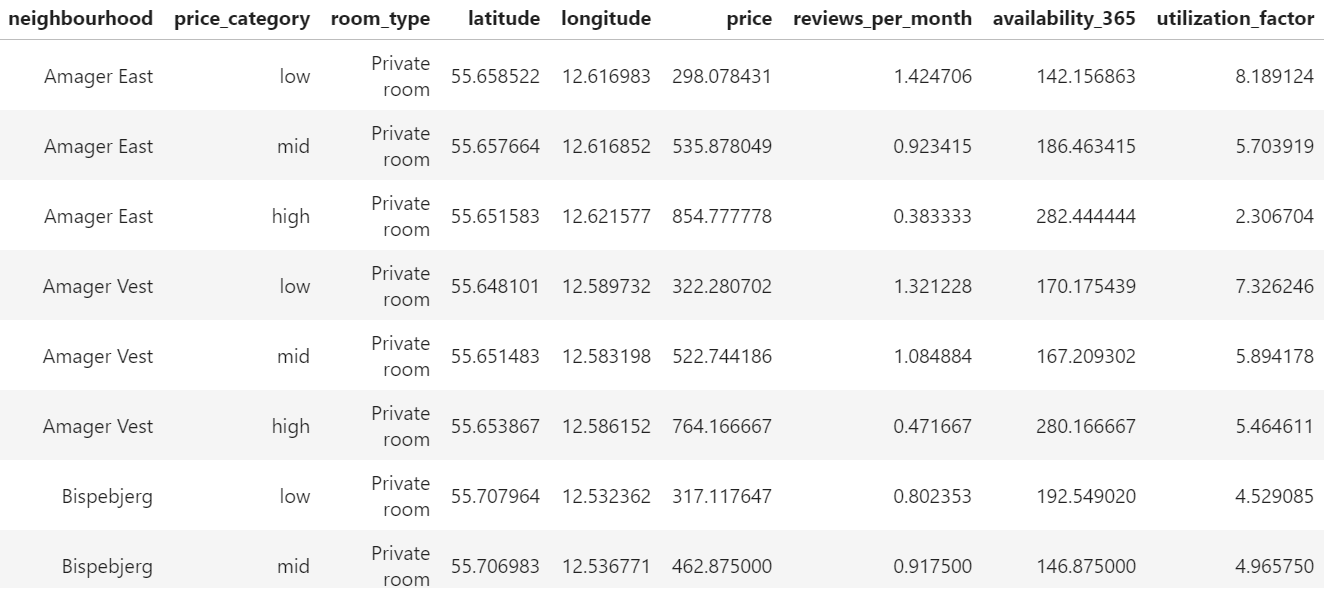

### 4.2 Getting nearby venues

We explored each of the 29 datapoints' nearby revenues and collected their respective venue name, geolocation (i.e., latitude and longitude) and venue categories. We limit our exploration values to 500 meter radius around the datapoints and up to 100 venues in each of the datapoints. Overall, we collected 2029 venue locations.

<center>Table 2. Representative dataset,with 2029 datapoints, of different venues collected from API Foursquare.

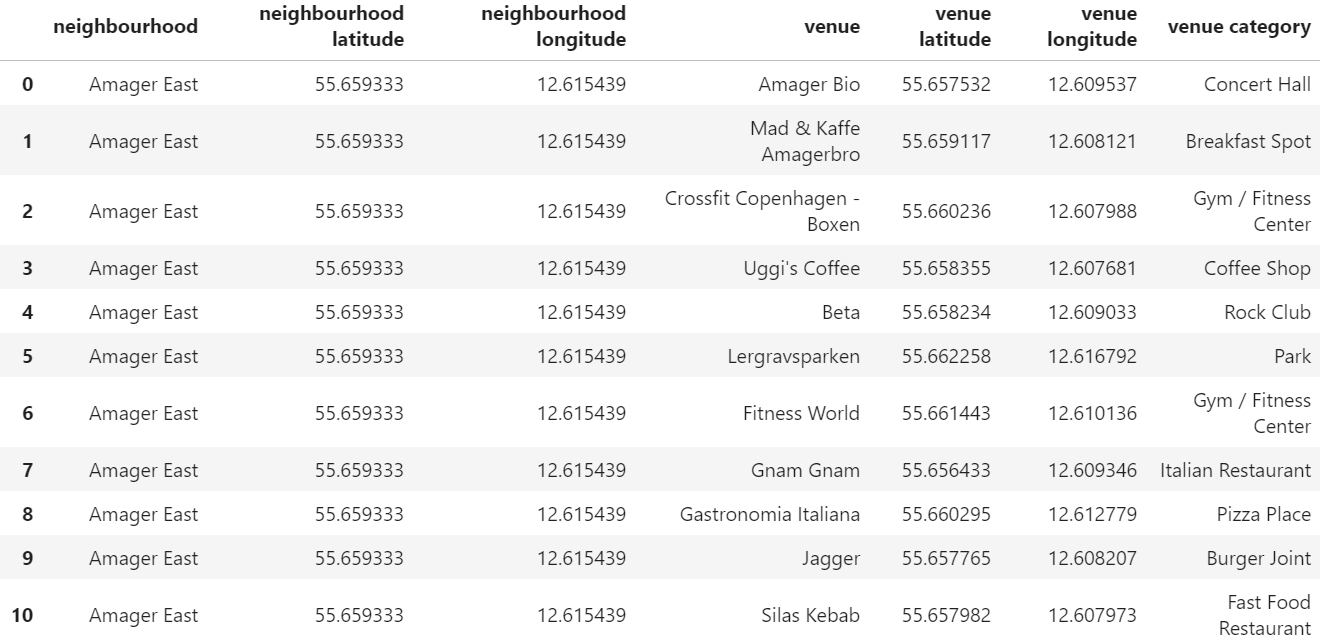

### 4.3 Data Reduction and Feature Selection of API Foursquare venues

In order to identify the characteristic of the neighbourhood, we unrolled the venue category column by using <b>pandas.DataFrame.onehotencoding</b> to explicitly identify the number of unique venue categories per datapoint. Thereafter, we used used the <b>pandas.DataFrame.groupby</b> method and grouped the dataframe according to their respective neighbourhood. We summed up the venue locations according to their venue category.

<center>Table 3. Representative dataset of venue category grouped according to neighbourhood

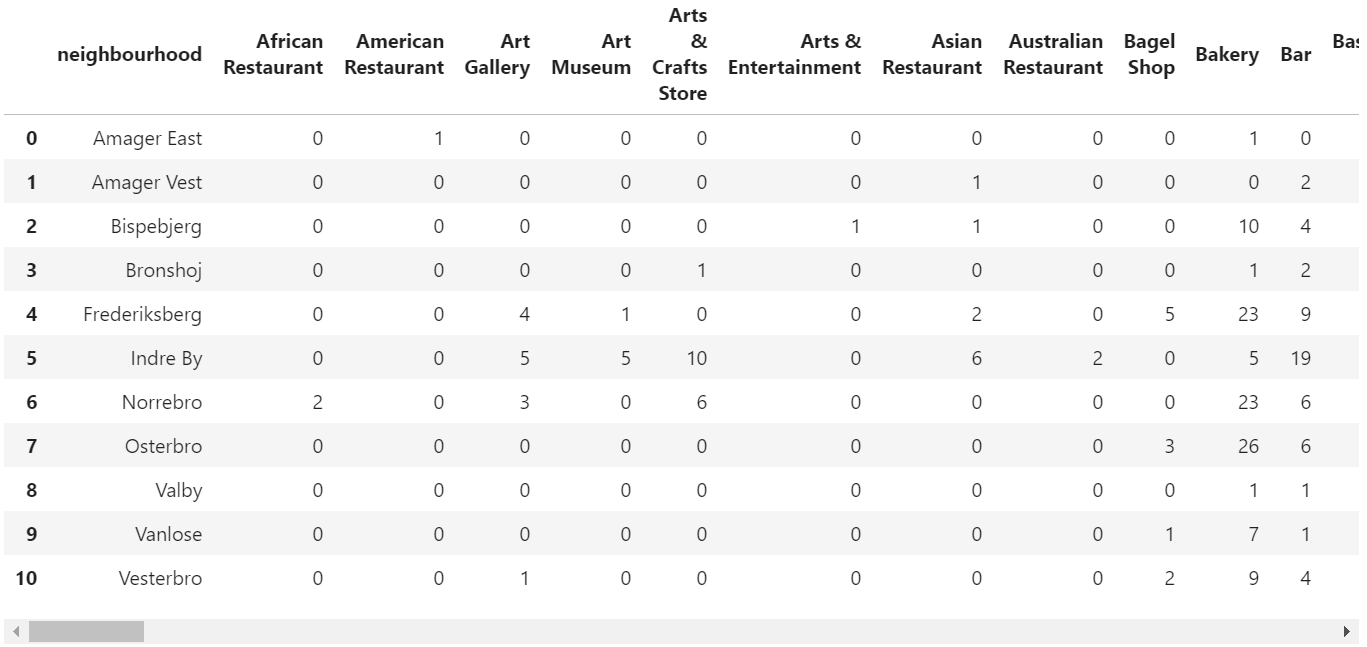

Moreover, we reduced this dataset to group the different venue categories to 5 sub-groups. Using the <b>Series.str.contain</b> function, we scraped the column names of venue categories and grouped them according to following set of rules:

- <b>Restaurant Category</b>: any string containing 'Restaurant' in the columns
- <b>Cafe Category</b>: any string containing 'Bakery, Breakfast, Coffee, Cafe' in the columns
- <b>Quick Bite Category</b>: any string containing 'Fast, Salad, Bagel, Pizza, Sandwich, Deli' in the columns
- <b>Art Category</b>: any string containing 'Museums, Galleries, Theatres, Music Venue' in the columns
- <b>Activity Category</b>: any string containing 'Parks, Landmarks, Playground' in the columns
- <b>Drink Category</b>: any string containing 'Pubs, Bars, Bodegas' in the columns

It is an assumption that these categories are essential when choosing AirBnB locations.

## 5. Clustering using KMeans

### 5.1 Data Preparation and Fitting

We used the entire AirBnB Private Room Listing data and populated it with data features of revenue category from API Foursquare. There were two fitting scenarios that were employed to identify the influence of each of the parameters.

- First fitting: API Foursquare Features only

- Second fitting: Price + Utilisation Factor + API Foursquare Features

Prior to fitting, we used <b>sklearn.preprocessing.StandardScaler</b> method to standardize the input dataset. In addition, we used the Elbow technique to identify the number of clusters for fitting. In both of the fittings, k = 6 showed the significant elbow distortion, thus were used in the KMeans fitting procedure.

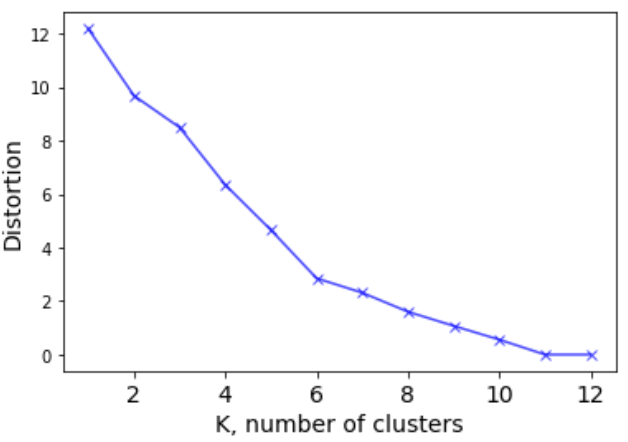

<center>Figure 5. Elbow Method showing the optimal number of clusters for KMeans

## 6. Results and Discussion

### 6.1 Characteristics of Neighbourhood

Figure 6 shows the number of different venue categories as a function of neighbourhoods in Copenhagen. Indre By, which is the old town / city center of Copenhagen, mostly topped the different venue categories with the exception of Quick Bites categories. Norrebro, Osterbro, and Frederiksberg are also a popular area especially when it comes to Cafes and Quick Bites, which are essential for a traveler with a tight budget.

It is also interesting to note that Amager East, Amager West, Bispebjerg, Bronshoj, Valby, do not have similar number of important venue categories for a traveller. This means that if one decided to stay in these areas, it is likely that they need to go to a different neighbourhood to experience more of what Copenhagen has to offer. In contrast, these areas may be suitable if travellers prefer to stay in a quiet area, free from the fast-paced urban lifestyle. 

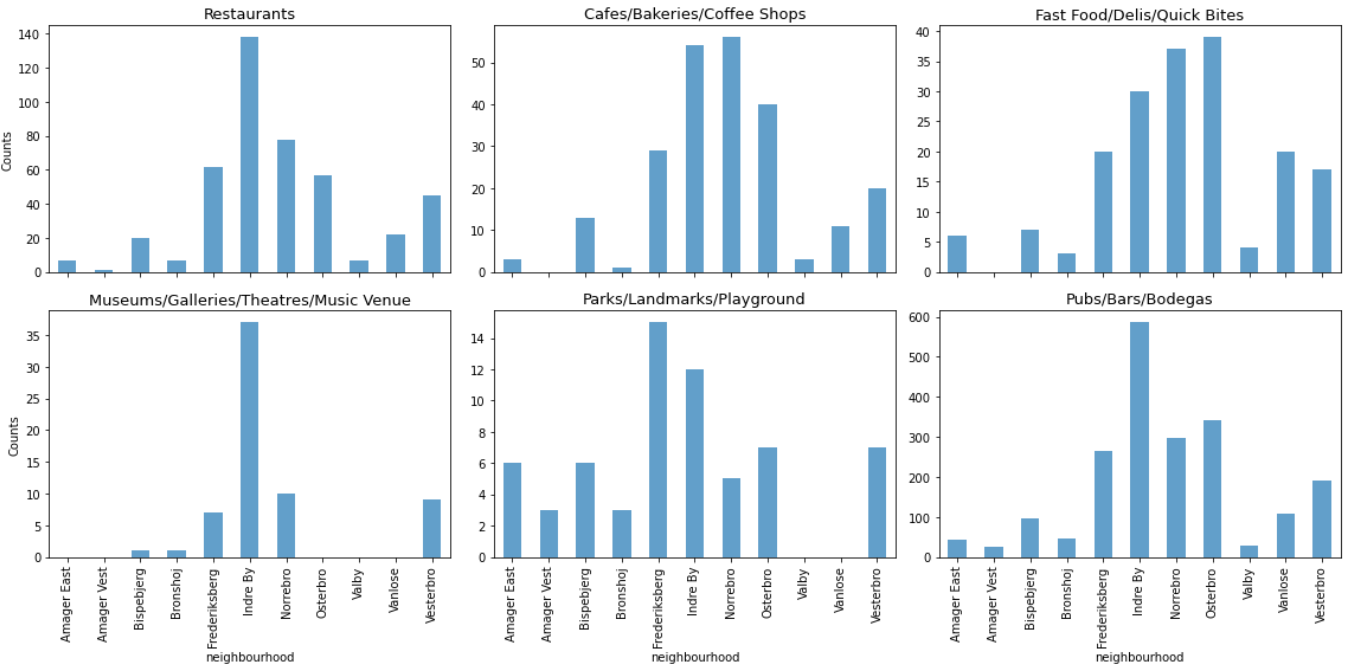

<center> Figure 6. Number of different venue categories in various neighbourhoods in Copenhagen

### 6.2 KMeans Clustering

#### 6.2.1 Using Foursquare API Features Only

Using KMeans clustering with k=6, the AirBnB Private Room listings were clustered according to the neighbourhoods which they belong to. This is especially true with neighbourhoods of Indre By (Blue), Vesterbro (Cyan), Frederiksberg(Purple), Norrebro (Pink), and Osterbro (Yellow). The other neighbourhoods such as Bispebjerg, Bronshoj, Valby, Vanlose, Amager West, and Amager East were clustered together (Green). They represent the outer area of Copenhagen where limited activity seem to exist as shown in Figure 6. Ultimately, KMeans clustering showed that it was able to determine AirBnB listings that are high in activity and listings with low activity (Green).

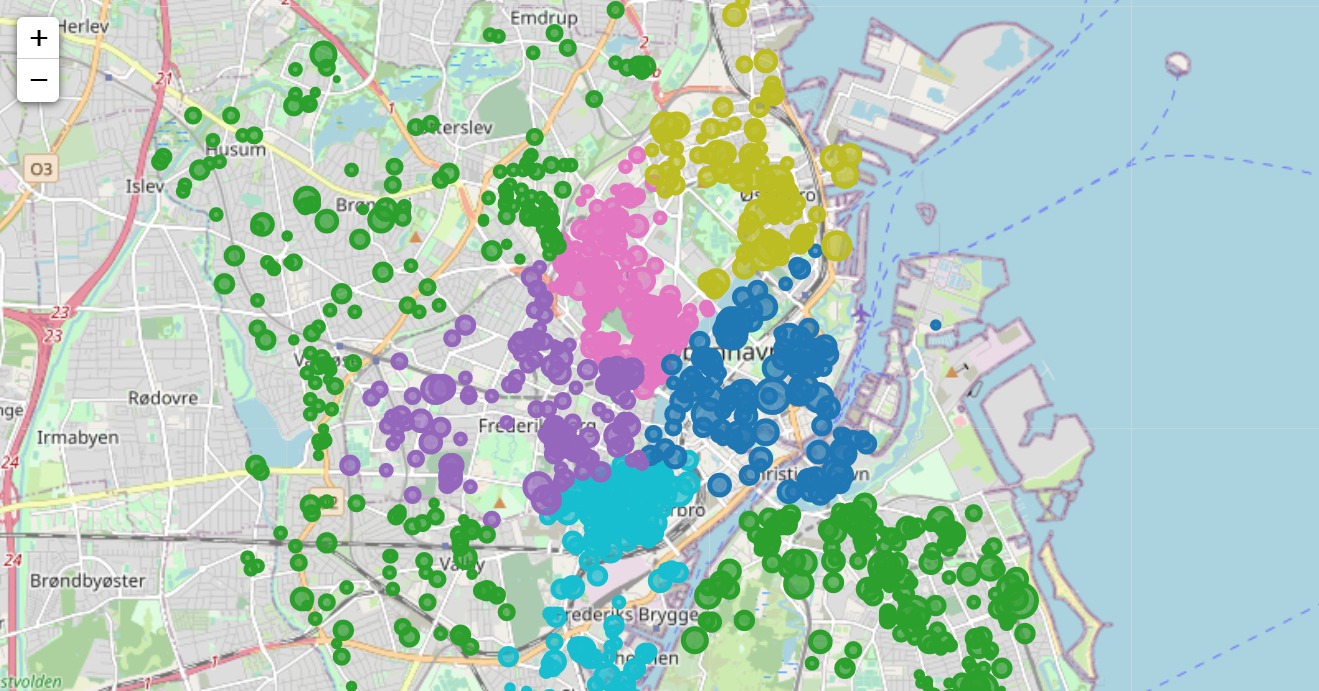

<center> Figure 7. Result of KMeans clustering using Foursquare features only

#### 6.2.2 Using Price and Utilization Factor with API Foursquare

When adding price and utilization factor in the feature set for Kmeans clustering, we see that the AirBnB listings turned to be heterogeneous and were not governed by their respective neighbourhoods. This shows that the price and utilization factors exhibit significant influence on the clustering of listings. 

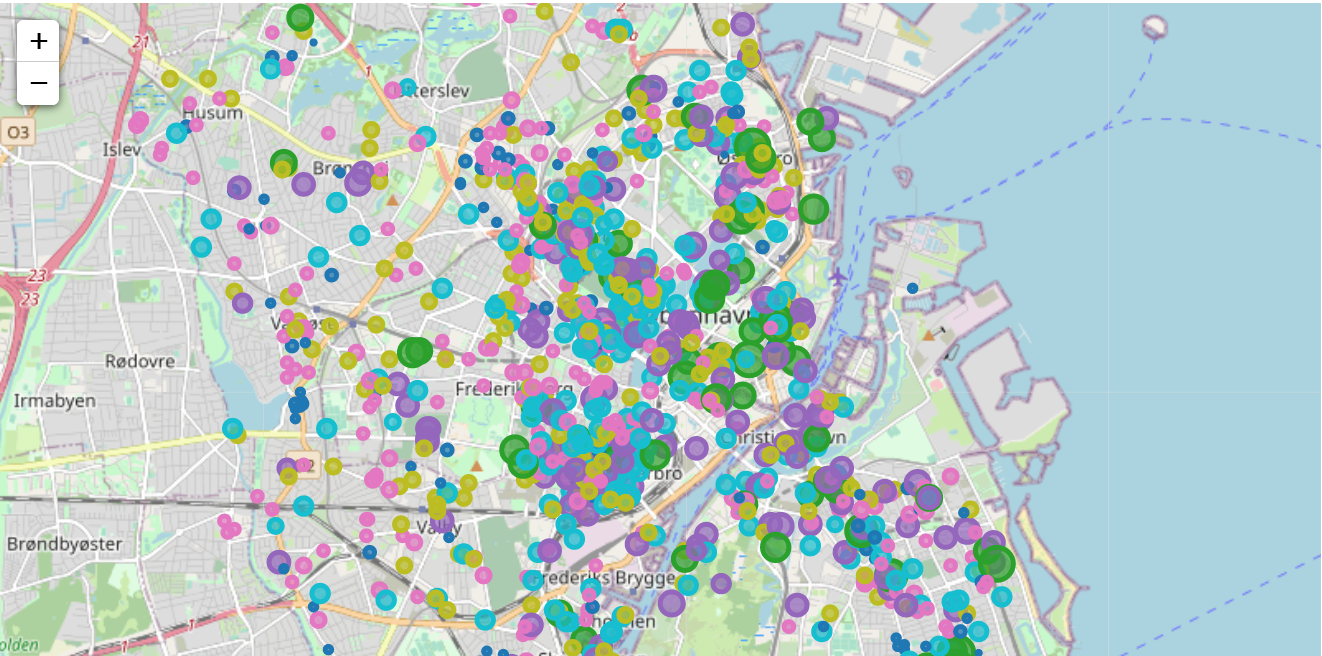

<center> Figure 8. Result of KMeans clustering using price, utilization factor with Fourquare features.

Figure 9 shows the bar graph of price vs. neighbourhood grouped by their respective clusters. Clearly, we can see that the clusters were grouped according the listing price. We can see that Cluster 4 has the cheapest accommodation price, while Cluster 6 shows the most expensive accommodation.

For Indre By, we can see that its utilization factor is significantly high, irrespective of Cluster. This suggests that accommodations within Indre By are more popular and the guests are not sensitive to pricing.

We can also see that the utilization factor of Amager East, Amager West, and Bronshoj faired well in comparison to the other more active neighbourhood. This is especially significant when the price range are above DKK 400. This could be due to the fact that these areas have more newly constructed buildings with new rooms, which are an attractive spot for tourists.Ultimately, this means that tourists are willing to shell out more money in exchange for a lesser lively but newly built area.

The utilization factor of Cluster 1, Cluster 4, and Cluster 5, seem to be between 3-2.5. These numbers are relatively higher in comparison to the utilization factors of Cluster 2, Cluster 3, and Cluster 6, at about 1.5-2. These suggest that the utilization of low to mid-priced accommodations are higher, in comparison to the higher priced accommodation.

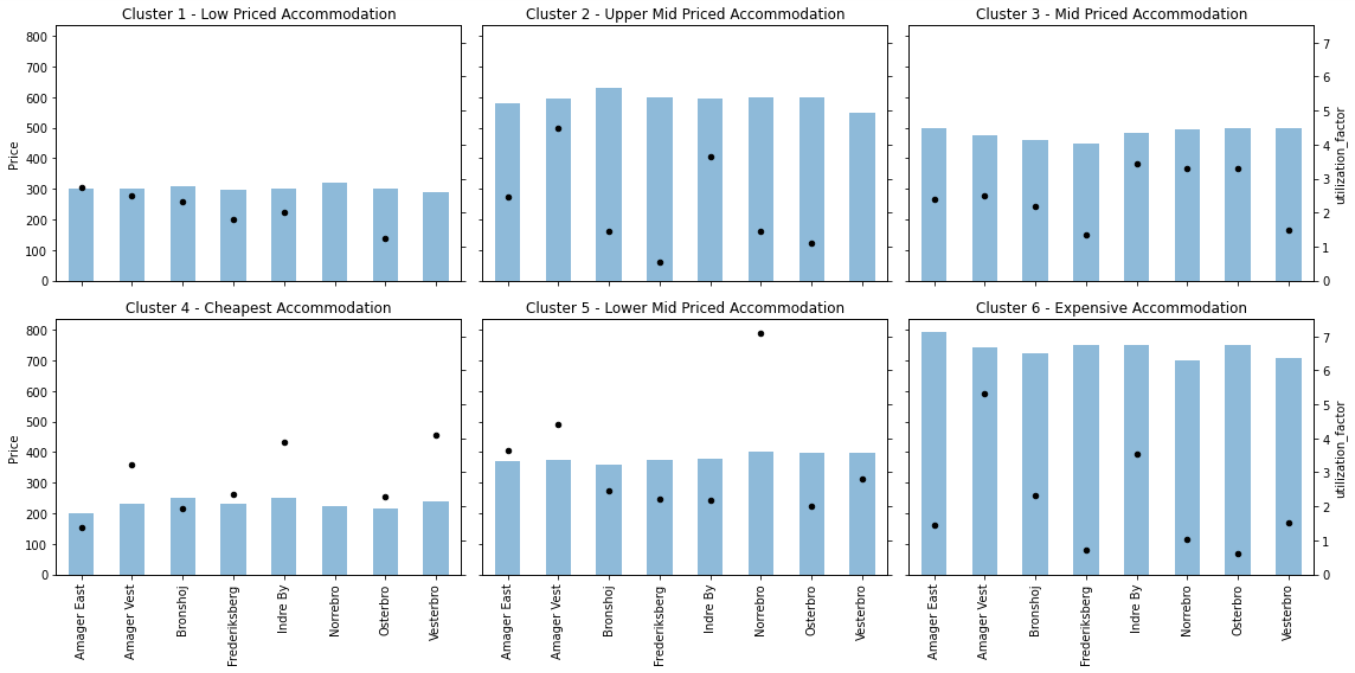

<center> Figure 9. Bar plots of different clusters as a function of pricing and grouped by different neighbourhoods

## 7. Conclusion

This report analyses the AirBnB accommodation in Copenhagen, specifically with the Private Room listings. Our analysis suggest that a high number of important venue categories (i.e., Restaurant, Quick Bites, Art, Landmarks, Bars) are present in the central area of Copenhagen with neighbourhoods such as Indre By, Norrebro, Osterbro, Vesterbro, and Frederiksberg. In contrast, the outer neighbourhood areas do not have these important venue categories, which may suggest that tourists need to go elsewhere for activities.

Price is determined to be one of the most important feature when grouping these accommodation. A variety of price ranges exist in Copenhagen, irrespective of the neighbourhood. The cheapest accommodation with a median price of DKK 200 can be found in all parts of the city. With utilization factor of about 2-2.5, suggesting their highly utilized characteristics.

The most expensive accommodations have median price of about DKK 700, found in all of the Copenhagen's neighbourhood. The utilization factor of these accommodations are lower, about 1.5-2, which means higher degree of availability for tourists.

Interestingly, the utilization factor of outer neighbourhoods were not affected by low number of venue categories. In fact, these outer neighbourhoods have high utilization rates especially at high price points. This could be driven by the appeal of newly built buildings present in these areas or family-type tourists who wish to spend time in Copenhagen at a more relaxed pace.

## 8. Future Directions

We have analysed the AirBnB listing with particular attention to Private Room type accommodation. Moving forward, it would be interesting to identify the (dis)similarity in results with the Apartment type accommodation. Moreover, another instance to look at, is to use the full feature of Foursquare API, delimiting the number of calls, to fully understand and differentiate the AirBnB listings in Copenhagen, in a more granular and detailed way.